# About the data set (Heart disease data)
The dataset contains information about patients. The aim is to find whether or not a patient has cardiovascular disease based on the several factors from the patient profile.
Attribute information:

male: Gender of patient: male(1) or female(0)

age: Age of patient

education: Education level of patient: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college

currentSmoker: Whether the patient is a smoker now: Yes(1) or No(0)

cigsPerDay: Average number of cigarettes smoked by patient per day

BPMeds: Whether the patient is on blood pressure medications: Yes(1) or No(0)

prevalentStroke: If the patient has a history of heart stroke: Yes(1) or No(0)

prevalentHyp: If the patient has a history of hypertension: Yes(1) or No(0)

diabetes: If the patient has a diabetes: Yes(1) or No(0)

totChol: Average cholesterol levels in mg/dL

sysBP: Average systolic blood pressure of patient

diaBP: Average diastolic blood pressure of patient

BMI: BMI of patient

heartRate: Avergae heartrate of patient

glucose: Average blood glucose levels of patient

CVD: Does the patient have cardiovascular disease: Yes(1) or No(0)



## Table of Content
- Logistic Regression Model
- Model Evaluation Metrics
- Performance Evaluation Metrics
- Determining optimal threshold
- Import the required libraries

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Load data set

In [2]:
df = pd.read_csv('Heart_disease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4240, 16)

In [5]:
def s(x):
    d=pd.read_csv(x)
    return d.shape[0]

In [6]:
s('Heart_disease.csv')

4240

### Summary

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# convert the columns that are wrongly specified as numeric to object type 

# convert the column male to object type
df['male'] = df['male'].astype(object)

# convert the column education to object type
df['education'] = df['education'].astype(object)

# convert the column currentSmoker to object type
df['currentSmoker'] = df['currentSmoker'].astype(object)

# convert the column BPMeds to object type
df['BPMeds'] = df['BPMeds'].astype(object)

# convert the column prevalentStroke to object type
df['prevalentStroke'] = df['prevalentStroke'].astype(object)

# convert the column prevalentHyp to object type
df['prevalentHyp'] = df['prevalentHyp'].astype(object)

# convert the column diabetes to object type
df['diabetes'] = df['diabetes'].astype(object)

In [10]:
num = df.select_dtypes(include=np.number).columns
cat = df.select_dtypes(exclude=np.number).columns
print('Total numeric columns : ',len(num), 'Columns : ',num)
print('Total Categorical columns : ',len(cat), 'Columns : ',cat)

Total numeric columns :  9 Columns :  Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'CVD'],
      dtype='object')
Total Categorical columns :  7 Columns :  Index(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes'],
      dtype='object')


### Missing values

In [11]:
Total = df.isnull().sum().sort_values(ascending=False)

In [12]:
Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [13]:
missing=pd.concat([Total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing

,Total,Percentage
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
male,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000


In [14]:
df.skew()

male                0.285997
age                 0.228867
education           0.688730
currentSmoker       0.023595
cigsPerDay          1.247052
BPMeds              5.551462
prevalentStroke    12.912160
prevalentHyp        0.818827
diabetes            5.995907
totChol             0.871881
sysBP               1.145285
diaBP               0.713250
BMI                 0.982183
heartRate           0.644372
glucose             6.214948
CVD                 1.940516
dtype: float64

In [15]:
missing.skew()

Total         3.441769
Percentage    3.441769
dtype: float64

- Data is positive skewed so filling the missing data with median and mode

In [16]:
df['glucose'].fillna(df['glucose'].median(),inplace=True)
df['BPMeds'].fillna(df['BPMeds'].median(),inplace=True)
df['totChol'].fillna(df['totChol'].median(),inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df['heartRate'].fillna(df['heartRate'].median(),inplace=True)
df['education'].fillna(df['education'].mode()[0],inplace=True)

In [17]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

### Taget variable - CVD

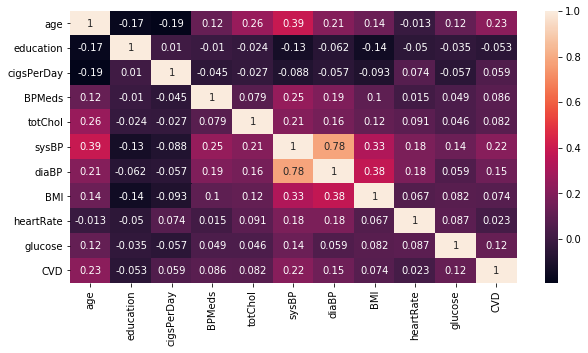

In [19]:
# checking correlation
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(),annot=True)
plt.show()

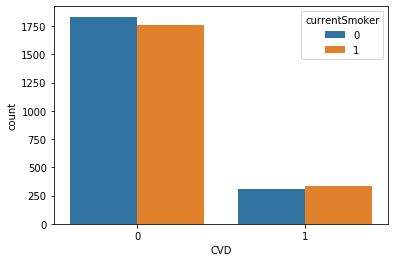

In [20]:
sns.countplot(df['CVD'],hue=df['currentSmoker'])
plt.show()

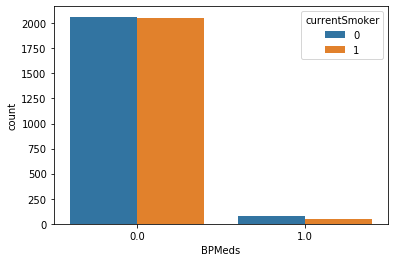

In [21]:
sns.countplot(df.BPMeds,hue=df['currentSmoker'])
plt.show()

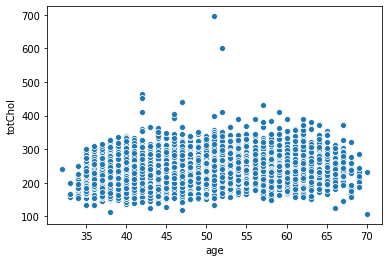

In [22]:
sns.scatterplot(df.age,df.totChol)

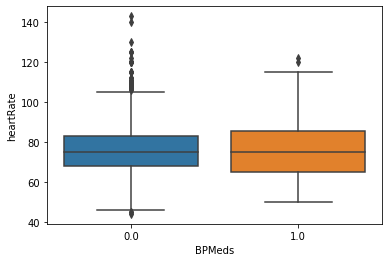

In [23]:
sns.boxplot(df.BPMeds,df.heartRate)

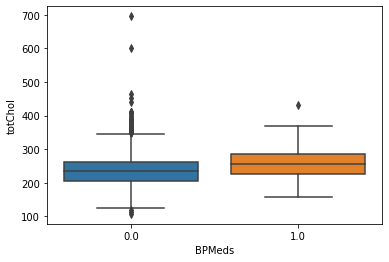

In [24]:
sns.boxplot(df.BPMeds,df.totChol)

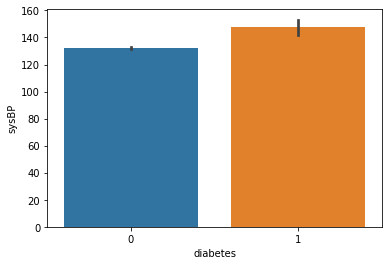

In [25]:
sns.barplot(df.diabetes,df.sysBP)

In [26]:
df['education'] = df['education'].astype(object)

In [29]:
df['BPMeds'] = df['BPMeds'].astype(object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   object 
 1   age              4240 non-null   int64  
 2   education        4240 non-null   object 
 3   currentSmoker    4240 non-null   object 
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   object 
 6   prevalentStroke  4240 non-null   object 
 7   prevalentHyp     4240 non-null   object 
 8   diabetes         4240 non-null   object 
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 530.1+ KB


In [31]:
df_cat = df.select_dtypes(include="object")
df_cat.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,4.0,0,0.0,0,0,0
1,0,2.0,0,0.0,0,0,0
2,1,1.0,1,0.0,0,0,0
3,0,3.0,1,0.0,0,1,0
4,0,3.0,1,0.0,0,0,0


In [32]:
df_num = df.select_dtypes(include=np.number)
df_num.drop('CVD',axis=1,inplace=True)
df_num.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


### Encoding 

In [33]:
en=pd.get_dummies(df_cat,drop_first=True)

In [34]:
en

,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4235,0,1,0,0,1,0,0,0,0
4236,0,0,0,0,1,0,0,0,0
4237,0,1,0,0,0,0,0,0,0
4238,1,0,1,0,0,0,0,1,0


In [35]:
en.columns=['male','education_2.0','education_3.0','education_4.0','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']

In [36]:
en.head()

,male,education_2.0,education_3.0,education_4.0,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
0,1,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,1,0
4,0,0,1,0,1,0,0,0,0


### Model Selection

In [44]:
X = pd.concat([en,df_num],axis=1)
y = df['CVD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3392, 17)
(848, 17)
(3392,)
(848,)


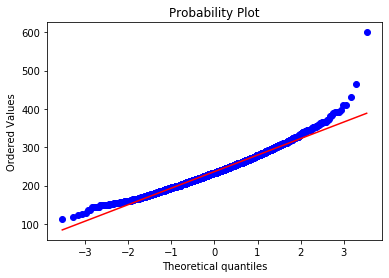

In [45]:
from scipy import stats
stats.probplot(X_train['totChol'],dist='norm',plot=plt)
plt.show()

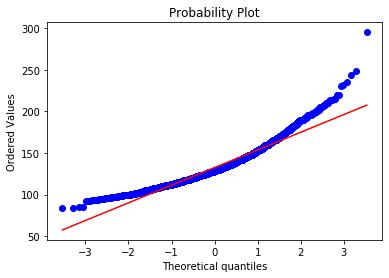

In [46]:
stats.probplot(X_train['sysBP'],dist='norm',plot=plt)
plt.show()

### Logistic Regression Model

In [47]:
#without scaling
model = LogisticRegression()
model.fit(X_train,y_train)
print("Training Accuracy: ")
print(model.score(X_train,y_train))
print("Testing Accuracy: ")
print(model.score(X_test,y_test))

Training Accuracy: 
0.8511202830188679
Testing Accuracy: 
0.8502358490566038


In [41]:
#using scaling
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
model.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(model.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(model.score(scaledXtest,y_test))

Training Accuracy
0.8531839622641509
Testing Accuracy
0.8573113207547169


In [51]:
#using powerTransformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
powerXtrain = pt.fit_transform(X_train)
powerXtest = pt.transform(X_test)
model.fit(powerXtrain,y_train)
print("Training Accuracy")
print(model.score(powerXtrain,y_train))
print("Testing Accuracy")
print(model.score(powerXtest,y_test))

Training Accuracy
0.8520047169811321
Testing Accuracy
0.8537735849056604


- It shows that using StandardScaler the performance of the model has improved

### Cross validation

In [48]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
Kfold_val = KFold(n_splits = 10, shuffle = True)
scoreslr = cross_val_score(model, X_train, y_train, cv=Kfold_val, scoring='accuracy')
np.mean(scoreslr)

0.8511261495748743

### Performance Evaluation Metrics

In [60]:
#model.predict(X_test)
#model.predict_proba(X_test)

In [49]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[718   2]
 [125   3]]


In [50]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('TN: ',tn,'\n','FP :',fp,'\n','FN: ',fn,'\n','TP: ',tp)

TN:  718 
 FP : 2 
 FN:  125 
 TP:  3


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       720
           1       0.60      0.02      0.05       128

    accuracy                           0.85       848
   macro avg       0.73      0.51      0.48       848
weighted avg       0.81      0.85      0.79       848



In [52]:
print(precision_score(y_test,y_pred,average=None)) # Precision = TP / (TP + FP)
print(recall_score(y_test,y_pred,average=None)) # Recall = tp / (tp + fn)
print(f1_score(y_test,y_pred,average=None)) # F-measure = 2 * Recall * Precision / (Recall + Precision)
print(accuracy_score(y_test,y_pred)) #Accuracy = (tp + tn) / (tp + tn + fp + fn)

[0.85172005 0.6       ]
[0.99722222 0.0234375 ]
[0.918746   0.04511278]
0.8502358490566038


### ROC & AUC

In [54]:
probas = model.fit(X_train, y_train).predict_proba(X_test)

In [55]:
# Compute ROC curve and area the curve for logistic
fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.728711


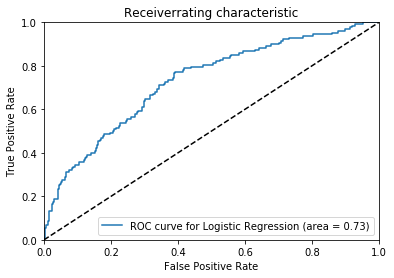

In [61]:
# Plot ROC curve
import pylab as pl
pl.clf()
pl.plot(fpr, tpr, label='ROC curve for Logistic Regression (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic')
pl.legend(loc="lower right")
pl.show()

In [59]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
print(roc.loc[(roc.tf-0).abs().argsort()[:1]])

          fpr       tpr     1-fpr        tf  thresholds
128  0.330556  0.671875  0.669444  0.002431    0.151305


- According to the accuracy_score model is performing 85% accuracy
- Threshold is less which is 15%
- As per ROC curve for logistic Regression the AUC is 73%

# END